# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Import dataset - xls

In [2]:
xls = pd.ExcelFile('imdb.xlsx')
df = xls.parse('imdb')
df_directors = xls.parse('directors')
df_countries = xls.parse('countries')
df

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration
0,The Shawshank RedemptionÊ,34,1,R,1994,9.3,28341469,142
1,The GodfatherÊ,33,1,R,1972,9.2,134821952,175
2,The Dark KnightÊ,16,1,PG-13,2008,9.0,533316061,152
3,The Godfather: Part IIÊ,33,1,R,1974,9.0,57300000,220
4,The Lord of the Rings: The Return of the KingÊ,83,1,PG-13,2003,8.9,377019252,192
...,...,...,...,...,...,...,...,...
173,The Perks of Being a WallflowerÊ,101,1,PG-13,2012,8.0,17738570,102
174,BrazilÊ,106,8,R,1985,8.0,9929000,142
175,Big FishÊ,108,1,PG-13,2003,8.0,66257002,125
176,True RomanceÊ,112,1,R,1993,8.0,12281500,121


In [3]:
df_directors

,id,director_name
0,1,Akira Kurosawa
1,2,Alejandro Amenabar
2,3,Alejandro G. Inarritu
3,4,Alfred Hitchcock
4,5,Andrew Stanton
...,...,...
112,113,Victor Fleming
113,114,Vincent Paronnaud
114,115,Wes Anderson
115,116,Wolfgang Petersen


In [4]:
df_countries

,id,country
0,1,USA
1,2,Italy
2,3,New Zealand
3,4,Japan
4,5,Brazil
5,6,Germany
6,7,France
7,8,UK
8,9,South Korea
9,10,India


# Join three Dataframes: 

# 1. df and df_countries

In [5]:
df = pd.merge(left=df, right=df_countries, how='inner', left_on='country_id', right_on='id')

df

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id,country
0,The Shawshank RedemptionÊ,34,1,R,1994,9.3,28341469,142,1,USA
1,The GodfatherÊ,33,1,R,1972,9.2,134821952,175,1,USA
2,The Dark KnightÊ,16,1,PG-13,2008,9.0,533316061,152,1,USA
3,The Godfather: Part IIÊ,33,1,R,1974,9.0,57300000,220,1,USA
4,The Lord of the Rings: The Return of the KingÊ,83,1,PG-13,2003,8.9,377019252,192,1,USA
...,...,...,...,...,...,...,...,...,...,...
173,Pan's LabyrinthÊ,42,17,R,2006,8.2,37623143,112,17,Spain
174,The Sea InsideÊ,2,17,PG-13,2004,8.1,2086345,125,17,Spain
175,The Secret in Their EyesÊ,61,16,R,2009,8.2,20167424,129,16,Argentina
176,Amores PerrosÊ,3,18,R,2000,8.1,5383834,115,18,Mexico


# 2. df and df_directors

In [6]:
df = pd.merge(left=df, right=df_directors, how='inner', left_on='director_id', right_on='id')

df

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
0,The Shawshank RedemptionÊ,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
1,The Green MileÊ,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
2,The GodfatherÊ,33,1,R,1972,9.2,134821952,175,1,USA,33,Francis Ford Coppola
3,The Godfather: Part IIÊ,33,1,R,1974,9.0,57300000,220,1,USA,33,Francis Ford Coppola
4,Apocalypse NowÊ,33,1,R,1979,8.5,78800000,289,1,USA,33,Francis Ford Coppola
...,...,...,...,...,...,...,...,...,...,...,...,...
173,Dancer in the DarkÊ,66,13,R,2000,8.0,4157491,140,13,Denmark,66,Lars von Trier
174,Pan's LabyrinthÊ,42,17,R,2006,8.2,37623143,112,17,Spain,42,Guillermo del Toro
175,The Sea InsideÊ,2,17,PG-13,2004,8.1,2086345,125,17,Spain,2,Alejandro Amenabar
176,The Secret in Their EyesÊ,61,16,R,2009,8.2,20167424,129,16,Argentina,61,Juan Jose Campanella


# Remove an extra character, Ê, at the end of each movie_title. 

In [7]:
df['movie_title'] = df['movie_title'].str.replace('Ê','')
df['movie_title']

df

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
0,The Shawshank Redemption,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
1,The Green Mile,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
2,The Godfather,33,1,R,1972,9.2,134821952,175,1,USA,33,Francis Ford Coppola
3,The Godfather: Part II,33,1,R,1974,9.0,57300000,220,1,USA,33,Francis Ford Coppola
4,Apocalypse Now,33,1,R,1979,8.5,78800000,289,1,USA,33,Francis Ford Coppola
...,...,...,...,...,...,...,...,...,...,...,...,...
173,Dancer in the Dark,66,13,R,2000,8.0,4157491,140,13,Denmark,66,Lars von Trier
174,Pan's Labyrinth,42,17,R,2006,8.2,37623143,112,17,Spain,42,Guillermo del Toro
175,The Sea Inside,2,17,PG-13,2004,8.1,2086345,125,17,Spain,2,Alejandro Amenabar
176,The Secret in Their Eyes,61,16,R,2009,8.2,20167424,129,16,Argentina,61,Juan Jose Campanella


# Director with the most movies

In [8]:
director_with_most = df['director_name'].value_counts().head(1)
director_with_most


Christopher Nolan    7
Name: director_name, dtype: int64

# From the director with the most movies above, save all of this director's movies and their ratings


In [9]:
director_with_most = df['director_name']=="Christopher Nolan"

all_movies_ratings = df.loc[director_with_most,["director_name","movie_title","imdb_score"]]

all_movies_ratings

,director_name,movie_title,imdb_score
5,Christopher Nolan,The Dark Knight,9.0
6,Christopher Nolan,Inception,8.8
7,Christopher Nolan,Interstellar,8.6
8,Christopher Nolan,Memento,8.5
9,Christopher Nolan,The Prestige,8.5
10,Christopher Nolan,The Dark Knight Rises,8.5
11,Christopher Nolan,Batman Begins,8.3


# Recommend a random movie that has a rating of over 8.3. 

In [10]:
star_rating=df["imdb_score"]>8.3
goodmovie = df[star_rating]
goodmovie

rand_int=random.randint(0,len(goodmovie)-1)
rand_goodmovie=goodmovie[rand_int:rand_int+1]
rand_goodmovie


#random_title = rand_goodmovie["movie_title"]
#random_title

#random_imdb_score=rand_goodmovie["imdb_score"]
#random_imdb_score

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
54,Alien,90,8,R,1979,8.5,78900000,116,8,UK,90,Ridley Scott


# Select the non-USA movies made after 1960 by Alejandro Amenabar

In [11]:
Alejandro_Amenabar_Movies= df.loc[(df['director_name']=='Alejandro Amenabar')&(df['title_year']>1960)&(df['country_id']!=1)]
Alejandro_Amenabar_Movies

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
175,The Sea Inside,2,17,PG-13,2004,8.1,2086345,125,17,Spain,2,Alejandro Amenabar


In [12]:
How long did the movie Gladiator aim to keep your attention?

Object `attention` not found.


In [13]:
gladiator_movie = (df["movie_title"]=="City of God")
df[gladiator_movie]

gladiator_duration= df.loc[gladiator_movie, "duration"]
gladiator_duration

138    135
Name: duration, dtype: int64

# Using numpy and pyplot, make an overlapping histogram that shows the score distribution vs. count of R-Rated movies and PG-13 ones.


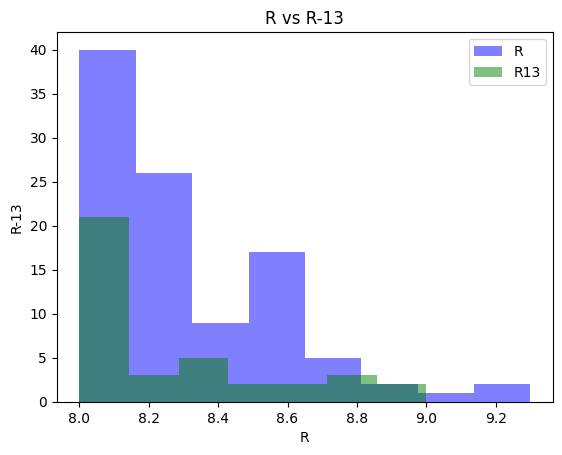

In [14]:
df_R = df[df["content_rating"] == "R"]
df_R

df_R13 = df[df["content_rating"] == "PG-13"]
df_R13


plt.hist(
    df_R['imdb_score'],
    alpha=0.5,
    color="blue",
    label="R",
    bins="auto"
)


plt.hist(
    df_R13['imdb_score'],
    alpha=0.5,
    color="green",
    label="R13",
    bins="auto"
)


plt.xlabel("R")
plt.ylabel("R-13")
plt.title("R vs R-13")
plt.legend(loc = "best")

plt.show()